In [1]:
#downloading the dataset
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/omkargurav/face-mask-dataset') #link of facemask dataset

Defaulting to user installation because normal site-packages is not writeable
Skipping, found downloaded files in "./face-mask-dataset" (use force=True to force download)


Importing Face Mask Dataset

In [2]:
!pip install onednn-cpu-gomp

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import urllib.request
from PIL import Image
import cv2 
from IPython.display import display



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
with_mask_files = os.listdir('face-mask-dataset/data/with_mask')
print(with_mask_files[0:3])
print(with_mask_files[-3:])

['with_mask_3643.jpg', 'with_mask_1550.jpg', 'with_mask_483.jpg']
['with_mask_781.jpg', 'with_mask_3546.jpg', 'with_mask_1197.jpg']


In [5]:
without_mask_files = os.listdir('face-mask-dataset/data/without_mask')
print(without_mask_files[0:3])
print(without_mask_files[-3:])

['without_mask_2595.jpg', 'without_mask_143.jpg', 'without_mask_3805.jpg']
['without_mask_2133.jpg', 'without_mask_2486.jpg', 'without_mask_251.jpg']


In [6]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [7]:
# create the labels

with_mask_labels = [1]*3725 #1 for images with mask

without_mask_labels = [0]*3828 #0 for images without mask

In [8]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [9]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [10]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

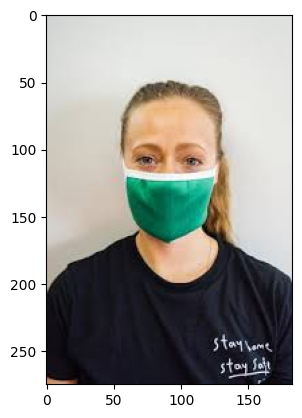

In [11]:
# displaying with mask image
img = mpimg.imread('face-mask-dataset/data/with_mask/with_mask_2612.jpg')
imgplot = plt.imshow(img)
plt.show()

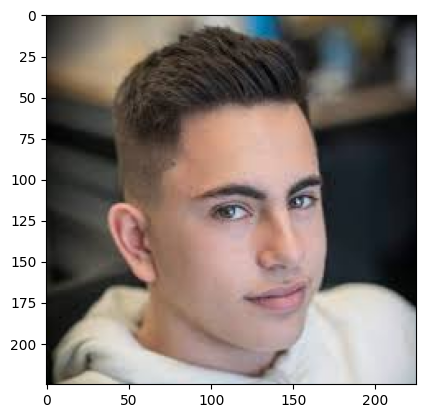

In [12]:
# displaying without mask image
img = mpimg.imread('face-mask-dataset/data/without_mask/without_mask_2584.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [13]:
# convert images to numpy arrays+

with_mask_path = 'face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'face-mask-dataset/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/glob/development-tools/versions/oneapi/2023.0.1/oneapi/intelpython/latest/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
type(data)

list

In [15]:
len(data)

7553

In [16]:
data[0]

array([[[207, 232, 252],
        [206, 231, 251],
        [206, 231, 251],
        ...,
        [100, 113,  75],
        [ 36,  48,  10],
        [ 37,  49,  11]],

       [[207, 232, 252],
        [207, 232, 252],
        [207, 232, 252],
        ...,
        [ 96, 108,  69],
        [ 38,  50,  11],
        [ 56,  68,  29]],

       [[207, 232, 252],
        [208, 233, 253],
        [208, 233, 253],
        ...,
        [ 93, 104,  63],
        [ 52,  63,  23],
        [ 69,  80,  39]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[0].shape

(128, 128, 3)

In [19]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [20]:
type(X)

numpy.ndarray

In [21]:
type(Y)

numpy.ndarray

In [22]:

print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [23]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [26]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [27]:
X_train[0]

array([[[198, 189, 186],
        [200, 192, 190],
        [201, 191, 190],
        ...,
        [192, 193, 203],
        [191, 193, 204],
        [192, 191, 204]],

       [[196, 190, 184],
        [197, 192, 188],
        [198, 191, 188],
        ...,
        [186, 192, 202],
        [186, 191, 201],
        [188, 190, 200]],

       [[195, 190, 182],
        [196, 191, 186],
        [198, 193, 190],
        ...,
        [185, 189, 200],
        [184, 188, 198],
        [184, 188, 197]],

       ...,

       [[ 84, 122,  67],
        [ 86, 122,  70],
        [ 93, 123,  82],
        ...,
        [ 40,  54,  86],
        [ 62,  76, 117],
        [ 84,  98, 147]],

       [[ 78, 115,  62],
        [ 80, 116,  66],
        [ 84, 113,  73],
        ...,
        [ 38,  51,  83],
        [ 57,  69, 109],
        [ 83,  96, 141]],

       [[ 73, 110,  58],
        [ 76, 112,  63],
        [ 77, 107,  68],
        ...,
        [ 37,  50,  80],
        [ 46,  59,  93],
        [ 84,  94, 141]]

In [28]:
X_train_scaled[0]

array([[[0.77647059, 0.74117647, 0.72941176],
        [0.78431373, 0.75294118, 0.74509804],
        [0.78823529, 0.74901961, 0.74509804],
        ...,
        [0.75294118, 0.75686275, 0.79607843],
        [0.74901961, 0.75686275, 0.8       ],
        [0.75294118, 0.74901961, 0.8       ]],

       [[0.76862745, 0.74509804, 0.72156863],
        [0.77254902, 0.75294118, 0.7372549 ],
        [0.77647059, 0.74901961, 0.7372549 ],
        ...,
        [0.72941176, 0.75294118, 0.79215686],
        [0.72941176, 0.74901961, 0.78823529],
        [0.7372549 , 0.74509804, 0.78431373]],

       [[0.76470588, 0.74509804, 0.71372549],
        [0.76862745, 0.74901961, 0.72941176],
        [0.77647059, 0.75686275, 0.74509804],
        ...,
        [0.7254902 , 0.74117647, 0.78431373],
        [0.72156863, 0.7372549 , 0.77647059],
        [0.72156863, 0.7372549 , 0.77254902]],

       ...,

       [[0.32941176, 0.47843137, 0.2627451 ],
        [0.3372549 , 0.47843137, 0.2745098 ],
        [0.36470588, 0

**Building a Convolutional Neural Networks (CNN)**

In [29]:
import tensorflow as tf
from tensorflow import keras

2023-04-08 07:45:12.571719: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-08 07:45:13.542542: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-08 07:45:16.107889: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-08 07:45:16.143511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 07:45:34.670504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

In [30]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 14s 70ms/step - loss: 0.5006 - acc: 0.7993 - val_loss: 0.2550 - val_acc: 0.9124
Epoch 2/10
170/170 [==============================] - 12s 69ms/step - loss: 0.3153 - acc: 0.8786 - val_loss: 0.2465 - val_acc: 0.9174
Epoch 3/10
170/170 [==============================] - 12s 69ms/step - loss: 0.2620 - acc: 0.8937 - val_loss: 0.1749 - val_acc: 0.9322
Epoch 4/10
170/170 [==============================] - 12s 69ms/step - loss: 0.2222 - acc: 0.9130 - val_loss: 0.2032 - val_acc: 0.9223
Epoch 5/10
170/170 [==============================] - 12s 69ms/step - loss: 0.1936 - acc: 0.9303 - val_loss: 0.1787 - val_acc: 0.9306
Epoch 6/10
170/170 [==============================] - 12s 69ms/step - loss: 0.1483 - acc: 0.9461 - val_loss: 0.1468 - val_acc: 0.9372
Epoch 7/10
170/170 [==============================] - 12s 69ms/step - loss: 0.1274 - acc: 0.9520 - val_loss: 0.1520 - val_acc: 0.9504
Epoch 8/10
109/170 [==================>...........] - ETA: 3s 

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSb8Ul62XEo84LPMg86t158c_rvRzj7nCrm5w&usqp=CAU"
filename = "test"

urllib.request.urlretrieve(url, filename)

#img = Image.open(filename)
#img.show()

#input_image_path = img#input('Path of the image to be predicted: ')
img = mpimg.imread(filename)



imgplot = plt.imshow(img)
plt.show()


input_image_resized = cv2.resize(img, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')